--- EDA ---
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     9

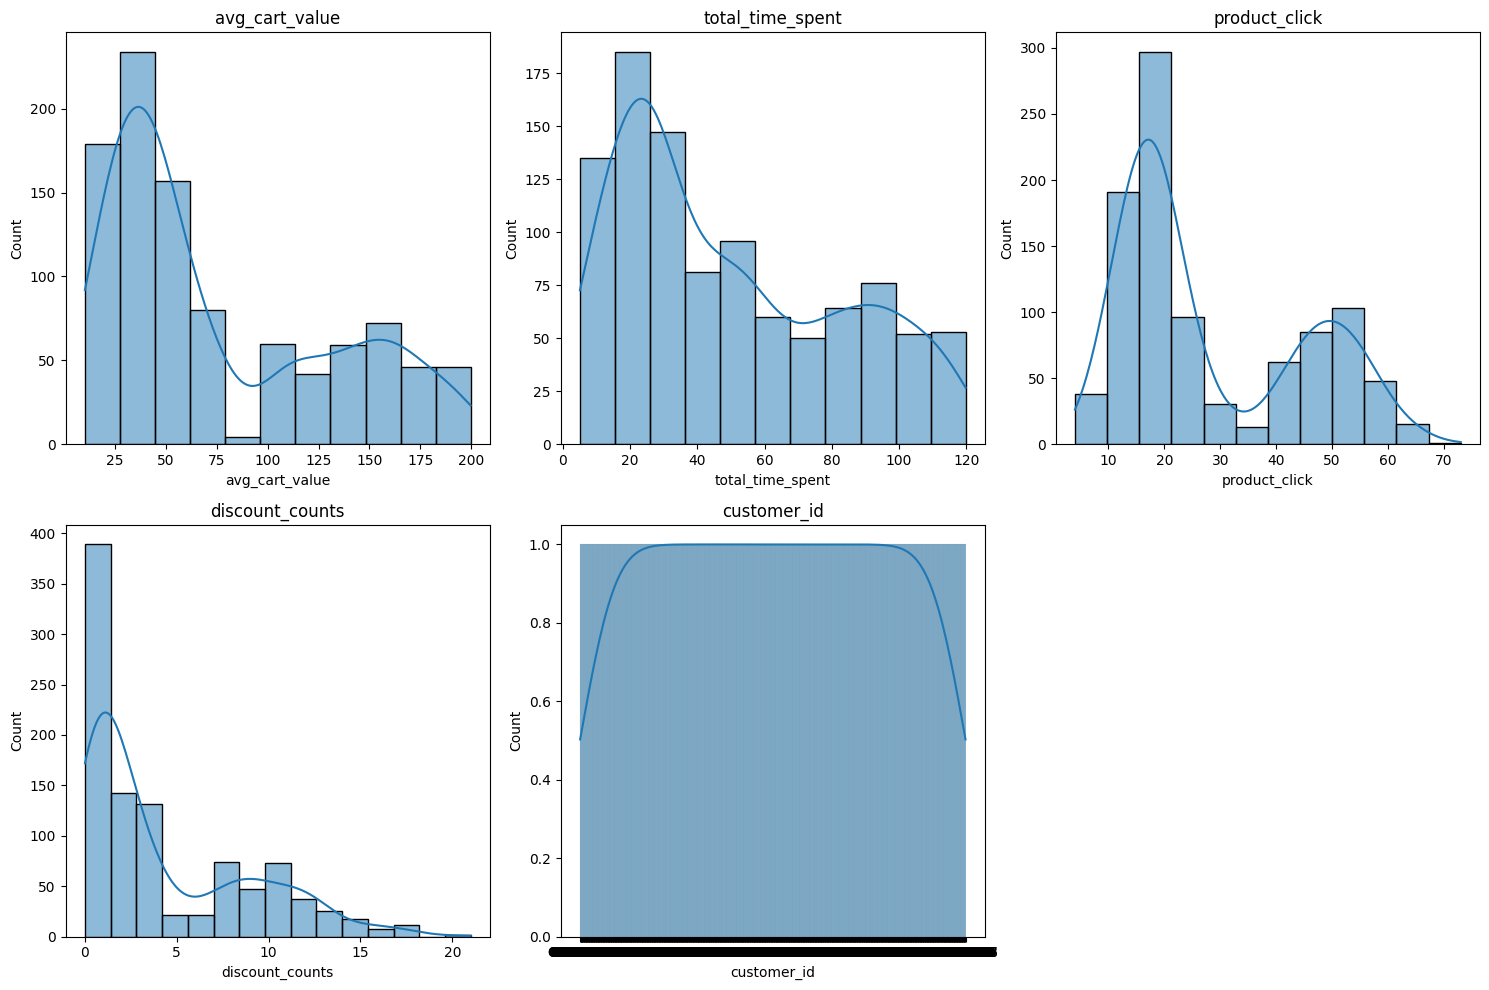

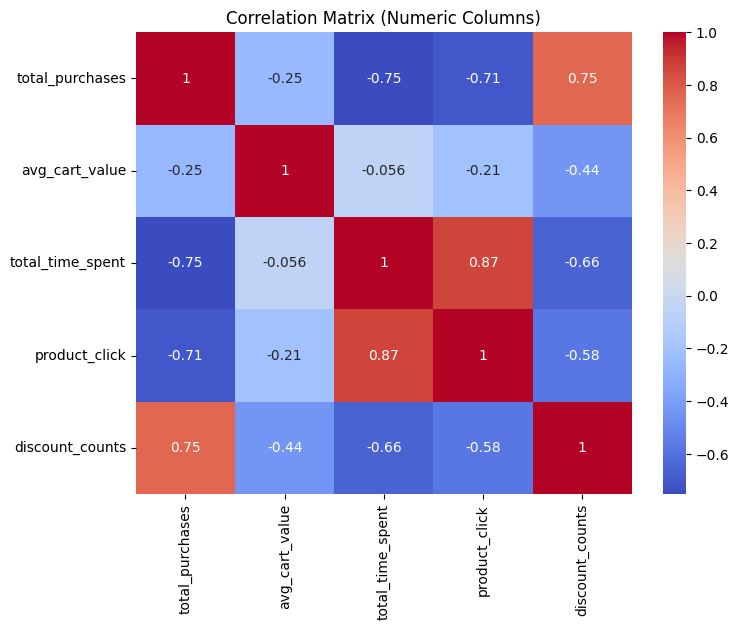

NaN values detected in scaled data. Imputing...

--- Model Selection ---


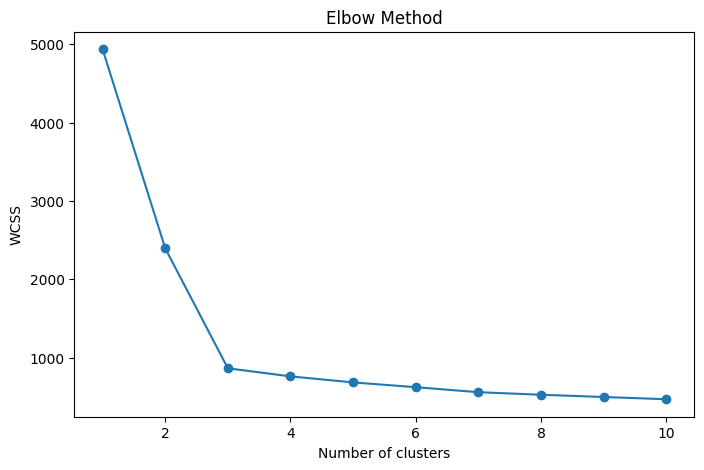

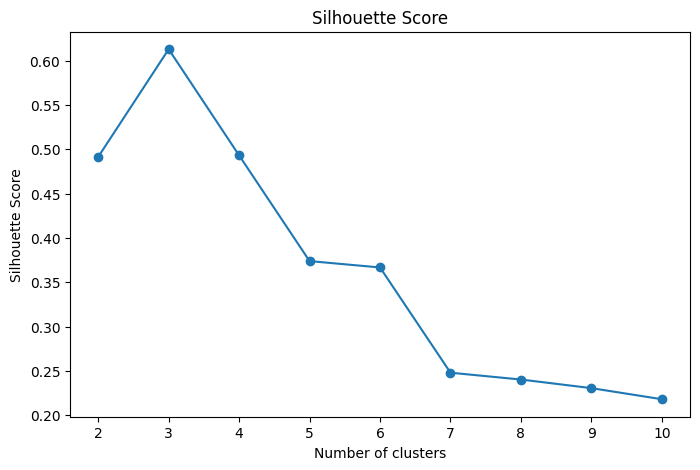


--- Model Evaluation ---
Silhouette Score: 0.6129584737316399

--- Identifying Clusters ---
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        10.212991      145.390574         40.472126      20.120186   
1         4.943626       49.348259         90.211837      49.457687   
2        19.540531       31.346684         17.511682      15.224222   

   discount_counts  
0         1.940120  
1         1.027108  
2         9.969970  


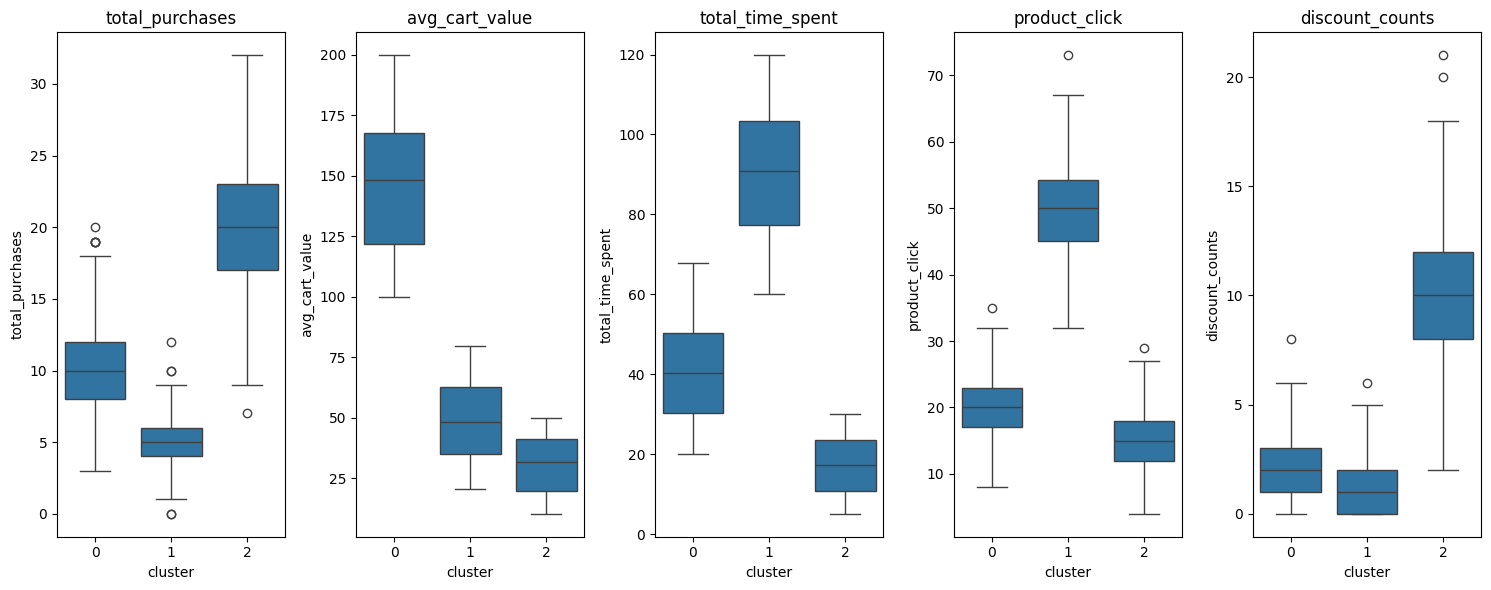

<Figure size 1500x1000 with 0 Axes>

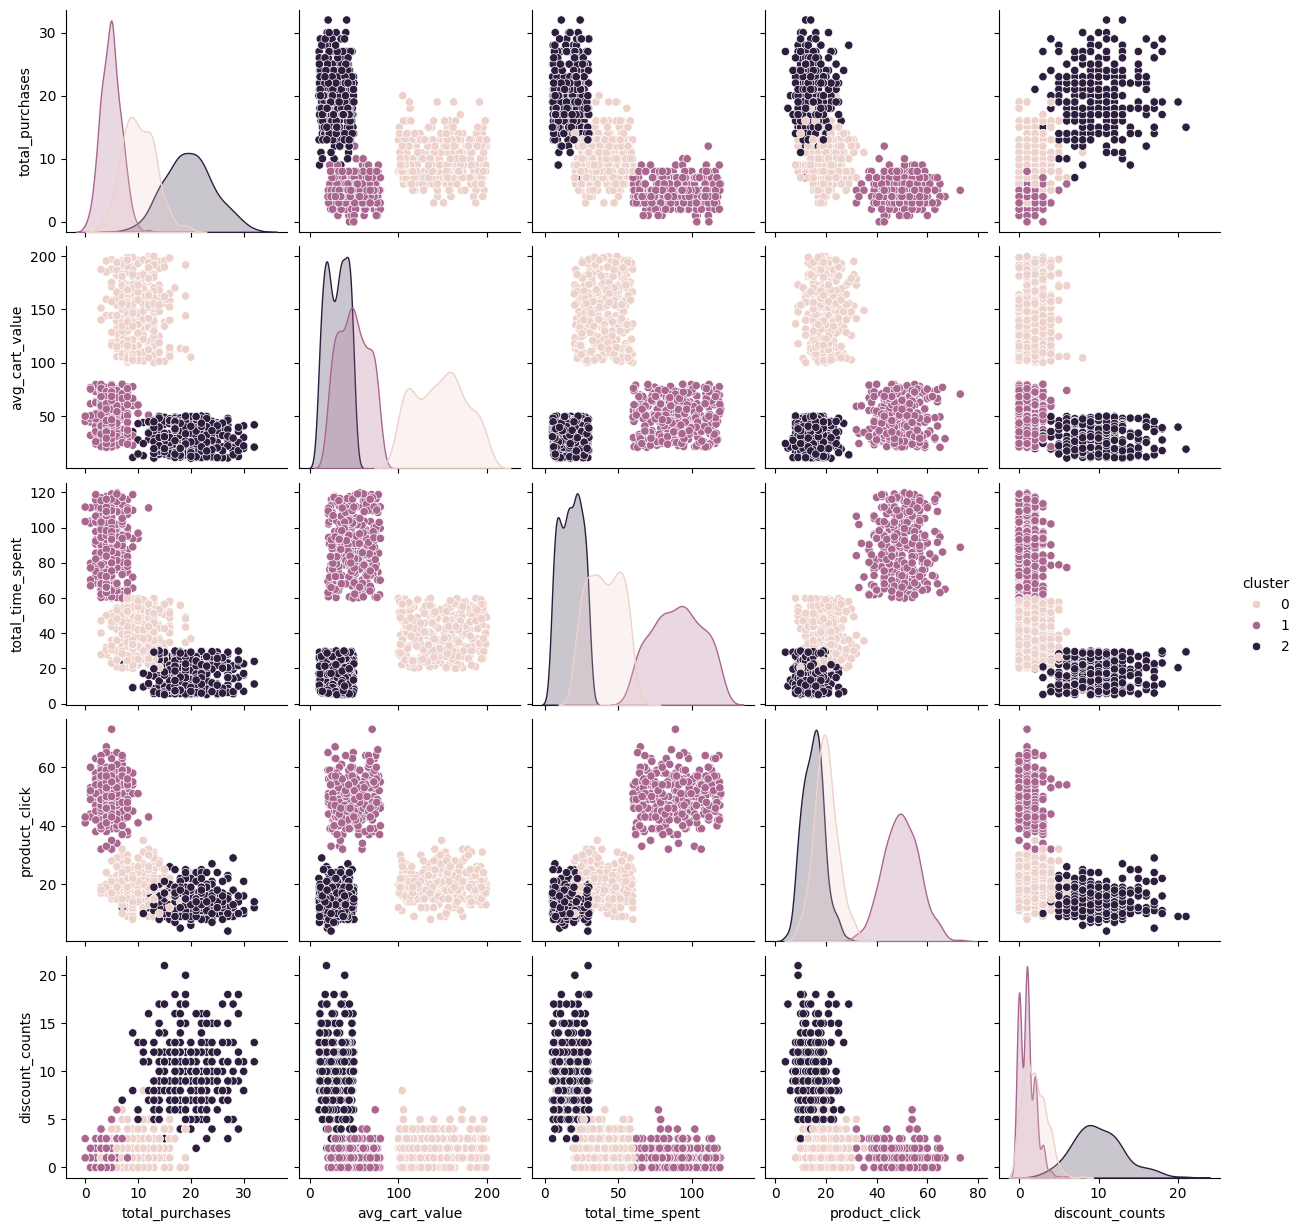


Cluster Descriptions:

Cluster 0 (Bargain Hunters):
total_purchases      10.175385
avg_cart_value      147.327169
total_time_spent     40.472126
product_click        19.895385
discount_counts       1.940120
cluster               0.000000
dtype: float64

Cluster 1 (High Spenders):
total_purchases      4.862805
avg_cart_value      49.029848
total_time_spent    90.211837
product_click       49.716463
discount_counts      1.027108
cluster              1.000000
dtype: float64

Cluster 2 (Window Shoppers):
total_purchases     19.711656
avg_cart_value      30.399509
total_time_spent    17.511682
product_click       14.944785
discount_counts      9.969970
cluster              2.000000
dtype: float64


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("/content/customer_behavior_analytcis.csv")  # Replace with your actual file path

# EDA
print("--- EDA ---")
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[1:]):  # Skip customer_id
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Visualize correlations
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Columns)")
plt.show()

# Preprocessing
X = df.drop("customer_id", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle potential NaN values after scaling
if np.isnan(X_scaled).any():
    print("NaN values detected in scaled data. Imputing...")
    imputer = SimpleImputer(strategy='mean')
    X_scaled = imputer.fit_transform(X_scaled)

# Model Selection
print("\n--- Model Selection ---")
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Using Silhouette Score to validate number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Based on Elbow method and Silhouette score, 3 clusters seem appropriate.

# Model Training
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Model Evaluation
print("\nModel Evaluation")
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Identifying Clusters
print("\nIdentifying Clusters")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print(cluster_centers_df)

# Visualize Clusters
plt.figure(figsize=(18, 6))
for i, col in enumerate(X.columns):
    plt.subplot(1, 6, i + 1)
    sns.boxplot(x='cluster', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

# Scatter plot for pairs of features
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='cluster', vars=X.columns)
plt.show()

# Cluster Descriptions
print("\nCluster Descriptions:")
print("\nCluster 0 (Bargain Hunters):")
print(df[df['cluster'] == 0].select_dtypes(include=['number']).mean())
print("\nCluster 1 (High Spenders):")
print(df[df['cluster'] == 1].select_dtypes(include=['number']).mean())
print("\nCluster 2 (Window Shoppers):")
print(df[df['cluster'] == 2].select_dtypes(include=['number']).mean())